In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [2]:
def infinte_cube_AVG(img):
    
    new_img = cv2.resize(img, (2*img.shape[1], img.shape[0]))

    # Make the height and width of even number
    if new_img.shape[0]%2 != 0:
        new_img = new_img[0:-1, :, :]
    if new_img.shape[1]%2 != 0:
        new_img = new_img[:, 0:-1, :]
#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image vertically into top image and bottom image
    height, width, channels = new_img.shape
    half_height = height//2

    top_img, bottom_img = new_img[:half_height, :], new_img[half_height:, :]

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()
#     top_img.shape, bottom_img.shape

    # Perform avg operation between top and bottom section of images
    tr, tg, tb = cv2.split(top_img)
    br, bg, bb = cv2.split(bottom_img)
    
    rr, rg, rb = ((tr + br) / 2).astype(np.uint8), ((tg + bg) / 2).astype(np.uint8), ((tb + bb) / 2).astype(np.uint8)
    XOR_img = cv2.merge((rr, rg, rb))
#     top_img = cv2.merge(tr, tg, tb)
#     bottom_img = cv2.merge(br, bg, bb)

        
#     XOR_img = int((top_img + bottom_img)/2)

#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_width = width//4
    
    if width%4 != 0:
        quarter_width = int(width//4)
        reduce_dim = width%4
        XOR_img = XOR_img[:, 1:XOR_img.shape[1]-reduce_dim+1, :]
    img1, img2, img3, img4 = XOR_img[:, 0:quarter_width], XOR_img[:, quarter_width: 2*quarter_width], XOR_img[:, 2*quarter_width:3*quarter_width], XOR_img[:, 3*quarter_width:]
#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new top and bottom images by merging middle two images and two outermost images respectively 
    top_img = cv2.hconcat([img2, img3])
    bottom_img = cv2.hconcat([img1, img4])

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()
    
    # Form the image of originaly shape by concatenating the two images vertically
    new_img = cv2.vconcat([top_img, bottom_img])
#     plt.imshow(new_img)
#     new_img.shape
    
    # Expand vertically
    new_img = cv2.resize(new_img, (new_img.shape[1], 2*new_img.shape[0]))
#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image horizontally into left image and right image
    height, width, channels = new_img.shape
    half_width = width//2

    left_img, right_img = new_img[:, :half_width], new_img[:, half_width:]

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()
#     left_img.shape, right_img.shape

    # Perform XOR operation between left and right section of images
    tr, tg, tb = cv2.split(left_img)
    br, bg, bb = cv2.split(right_img)
    
    rr, rg, rb = ((tr + br) / 2).astype(np.uint8), ((tg + bg) / 2).astype(np.uint8), ((tb + bb) / 2).astype(np.uint8)
    XOR_img = cv2.merge((rr, rg, rb))


#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_height = height//4
    
    if height%4 != 0:
        quarter_height = int(height//4)
        reduce_dim = height%4
        XOR_img = XOR_img[1:XOR_img.shape[1]-reduce_dim+1, :, :]

    img1, img2, img3, img4 = XOR_img[0:quarter_height, :], XOR_img[quarter_height:2*quarter_height, :], XOR_img[2*quarter_height:3*quarter_height, :], XOR_img[3*quarter_height:, :]
#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new left and right images by merging middle two images and two outermost images respectively 
    left_img = cv2.vconcat([img2, img3])
    right_img = cv2.vconcat([img1, img4])

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
    new_img = cv2.hconcat([left_img, right_img])
#     plt.imshow(new_img)
#     new_img.shape

    return new_img

In [3]:
def infinte_cube_XOR(img):
    ''' Perform atomic operations on image similar to infinity cube. On performing these steps 'n' times, we can generate the biometric template.
        Input:
            img: The input image
        Output:
            returns the image after performing atomic operation once
    '''
    # Make width dimension even, if it is not
    if img.shape[1]%2 != 0:
        img = img[:, 0:img.shape[1]-1, :]    

    # Expand horizontally
    new_img = cv2.resize(img, (2*img.shape[1], img.shape[0]))

    # Make the height and width of even number
    if new_img.shape[0]%2 != 0:
        new_img = new_img[0:-2, :, :]
    if new_img.shape[1]%2 != 0:
        new_img = new_img[:, 0:-2, :]
#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image vertically into top image and bottom image
    height, width, channels = new_img.shape
    half_height = height//2

    top_img, bottom_img = new_img[:half_height, :], new_img[half_height:, :]

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()
#     top_img.shape, bottom_img.shape

    # Perform XOR operation between top and bottom section of images
    XOR_img = np.bitwise_xor(top_img, bottom_img)

#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_width = width//4
    if width%4 != 0:
        quarter_width = int(width//4)
        XOR_img = XOR_img[:, 1:XOR_img.shape[1]-1, :]

    img1, img2, img3, img4 = XOR_img[:, 0:quarter_width], XOR_img[:, quarter_width: 2*quarter_width], XOR_img[:, 2*quarter_width:3*quarter_width], XOR_img[:, 3*quarter_width:]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new top and bottom images by merging middle two images and two outermost images respectively 
    top_img = cv2.hconcat([img2, img3])
    bottom_img = cv2.hconcat([img1, img4])

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()
    
    # Form the image of originaly shape by concatenating the two images vertically
#     print(top_img.shape)
#     print(bottom_img.shape)
    new_img = cv2.vconcat([top_img, bottom_img])

#     plt.imshow(new_img)
#     new_img.shape
    
    # Expand vertically
    new_img = cv2.resize(new_img, (new_img.shape[1], 2*new_img.shape[0]))

#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image horizontally into left image and right image
    height, width, channels = new_img.shape
    half_width = width//2

    left_img, right_img = new_img[:, :half_width], new_img[:, half_width:]

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()
#     left_img.shape, right_img.shape

    # Perform XOR operation between left and right section of images
    XOR_img = np.bitwise_xor(left_img, right_img)

#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_height = height//4

    img1, img2, img3, img4 = XOR_img[0:quarter_height, :], XOR_img[quarter_height:2*quarter_height, :], XOR_img[2*quarter_height:3*quarter_height, :], XOR_img[3*quarter_height:, :]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new left and right images by merging middle two images and two outermost images respectively 
    left_img = cv2.vconcat([img2, img3])
    right_img = cv2.vconcat([img1, img4])

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
    new_img = cv2.hconcat([left_img, right_img])
#     plt.imshow(new_img)
#     new_img.shape

    return new_img

In [43]:
def infinte_cube_with_exchange(img):
    ''' Perform atomic operations on image similar to infinity cube. On performing these steps 'n' times, we can generate the biometric template.
        Input:
            img: The input image
        Output:
            returns the image after performing atomic operation once
    '''
    # Make width dimension even, if it is not
    if img.shape[1]%2 != 0:
        img = img[:, 0:img.shape[1]-1, :]    

#     # Expand horizontally
#     new_img = cv2.resize(img, (2*img.shape[1], img.shape[0]))
    new_img = img.copy()

    # Make the height and width of even number
    if new_img.shape[0]%2 != 0:
        new_img = new_img[0:-2, :, :]
    if new_img.shape[1]%2 != 0:
        new_img = new_img[:, 0:-2, :]
#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image vertically into top image and bottom image
    height, width, channels = new_img.shape
    half_height = height//2

    top_img, bottom_img = new_img[:half_height, :], new_img[half_height:, :]

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()
#     top_img.shape, bottom_img.shape

    # Exchange top and bottom pixel values
    exch_img = cv2.vconcat([bottom_img, top_img])
    

    # Split image into 4 equal parts
    height, width, channels = exch_img.shape
    quarter_width = width//4
    if width%4 != 0:
        quarter_width = int(width//4)
        exch_img = exch_img[:, 1:exch_img.shape[1]-1, :]

    img1, img2, img3, img4 = exch_img[:, 0:quarter_width], exch_img[:, quarter_width: 2*quarter_width], exch_img[:, 2*quarter_width:3*quarter_width], exch_img[:, 3*quarter_width:]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new top and bottom images by merging middle two images and two outermost images respectively 
    top_img = cv2.hconcat([img2, img3])
    bottom_img = cv2.hconcat([img1, img4])

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()
    
    # Form the image of originaly shape by concatenating the two images vertically
#     print(top_img.shape)
#     print(bottom_img.shape)
    new_img = cv2.vconcat([top_img, bottom_img])

#     plt.imshow(new_img)
#     new_img.shape
    
#     # Expand vertically
    new_img = cv2.resize(new_img, (img.shape[1], img.shape[0]))
#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image horizontally into left image and right image
    height, width, channels = new_img.shape
    half_width = width//2

    left_img, right_img = new_img[:, :half_width], new_img[:, half_width:]

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()
#     left_img.shape, right_img.shape

    # Exchange left and right sub-images
    exch_img = cv2.vconcat([right_img, left_img])

    # Split image into 4 equal parts
    height, width, channels = exch_img.shape
    quarter_height = height//4

    img1, img2, img3, img4 = exch_img[0:quarter_height, :], exch_img[quarter_height:2*quarter_height, :], exch_img[2*quarter_height:3*quarter_height, :], exch_img[3*quarter_height:, :]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new left and right images by merging middle two images and two outermost images respectively 
    left_img = cv2.vconcat([img2, img3])
    right_img = cv2.vconcat([img1, img4])

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
    new_img = cv2.hconcat([left_img, right_img])
#     plt.imshow(new_img)
#     new_img.shape

    return new_img

In [ ]:
# Generate template for a given image
def inf_cube_with_itr(icwi_img, iterations):
    ''' Create a template for the given image with specified number of iterations
        Input:
            icwi_img: an image for which we want to generate the template
            iterations: the nuber of times we want to perform infinty cube transforamtions to generate the tempalte
        Output:
            returns the generated template for the given input image
    '''
    icwi_template = icwi_img.copy()
    for _ in range(iterations):
        icwi_template = infinte_cube(icwi_template)
    return icwi_template


# Generate tempalte for whole batch at once
def gen_batch_template(gbt_imgs):
    ''' Generate a set of templates for the given set of images
        Input:
            gbt_imgs: a list of input images
        Output:
            returns the generated template for every image present in the input set
    '''
    gbt_temp = []
    for gbt_img_temp in gbt_imgs:
        gbt_img_temp = np.array(gbt_img_temp, dtype= 'uint8')
        gbt_img_temp = inf_cube_with_itr(gbt_img_temp, iterations)
        gbt_temp.append(gbt_img_temp)
    return gbt_temp

(250, 665, 3)

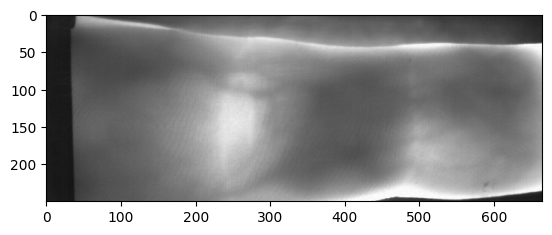

In [5]:
# Load image
img = cv2.imread('FV_base.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

In [ ]:
template1 = img.copy()

print(template1.max())
print(template1.min())

for cnt in range(100):
    if cnt <= 10:
        template1 = infinte_cube_XOR(template1)
        plt.figure(figsize=(10, 7))
        
        tmp_max = template1.max()
        tmp_min = template1.min()
        disp_img = (template1 - tmp_min) / (tmp_max - tmp_min)
        
        plt.imshow(disp_img)
        plt.title(f'Iteration: {cnt+1}')
        plt.axis('off')
        filename = f'iteration_{cnt+1}.png'
        plt.savefig('1.png')


C:\Users\HK Joshi\AppData\Local\Temp\ipykernel_10396\3994951212.py:10: RuntimeWarning: invalid value encountered in divide
  disp_img = (template2 - tmp_min) / (tmp_max - tmp_min)


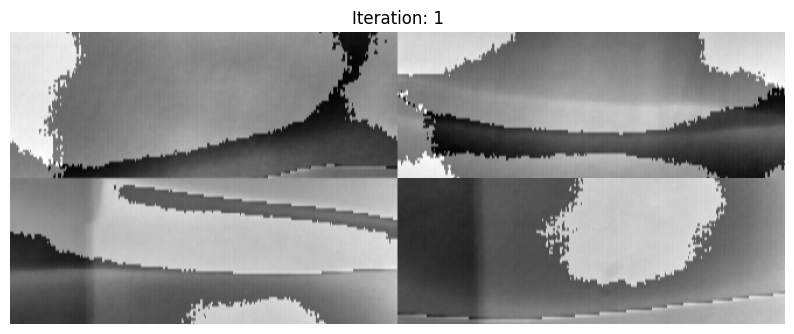

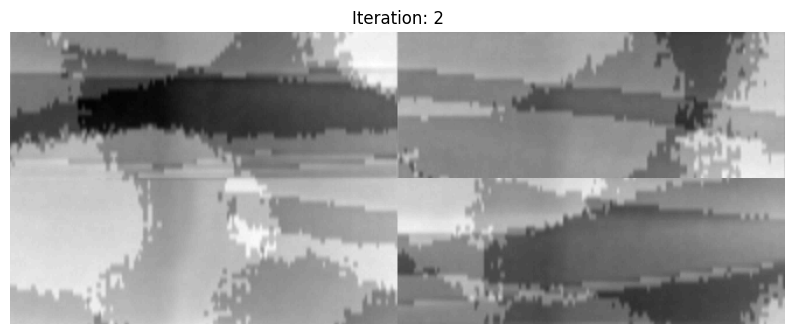

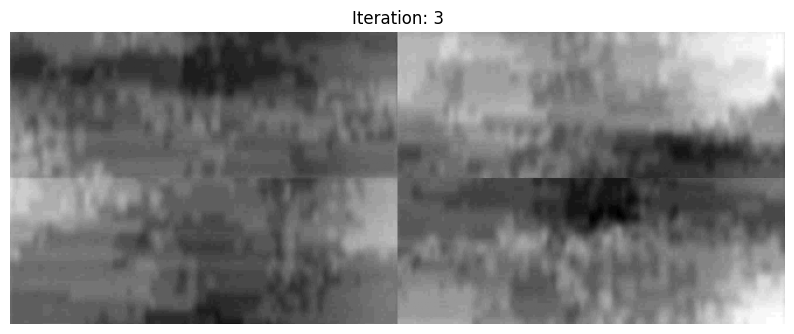

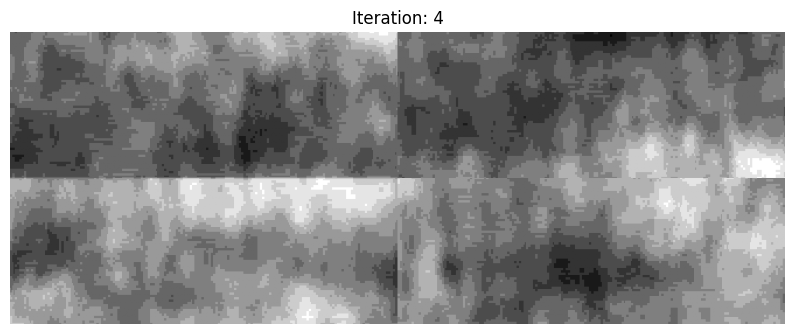

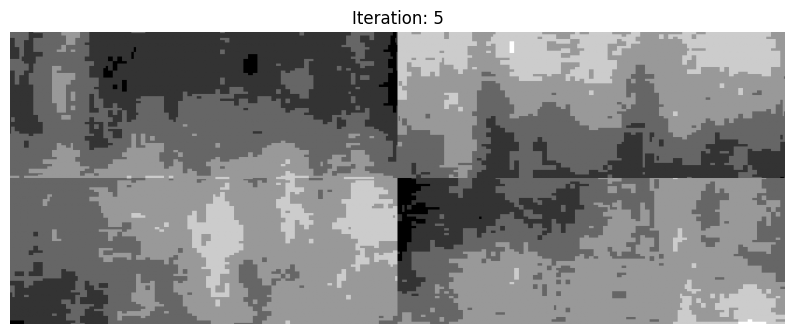

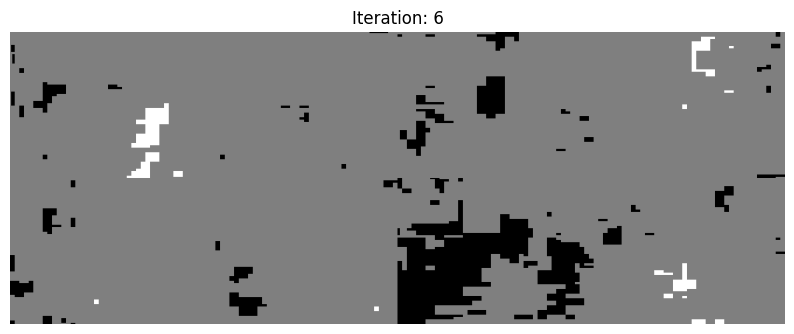

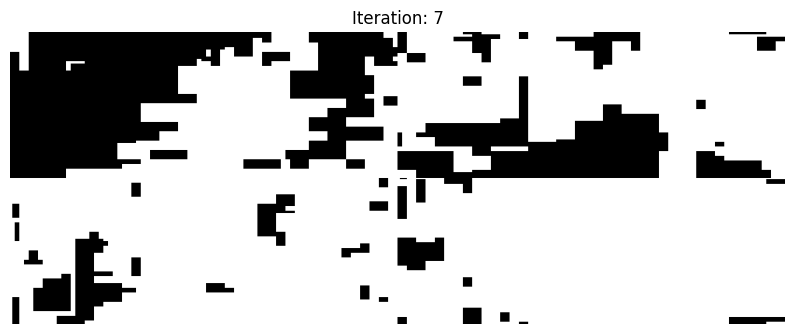

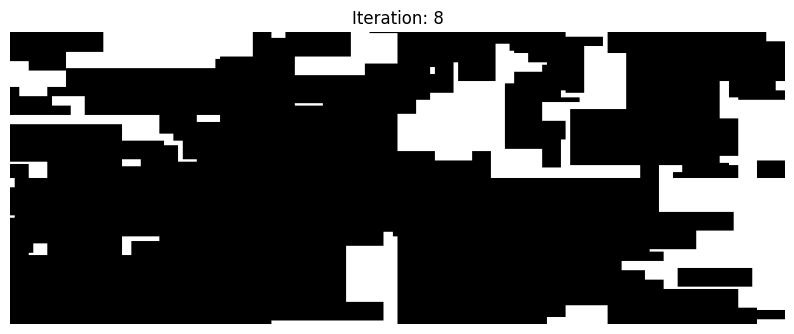

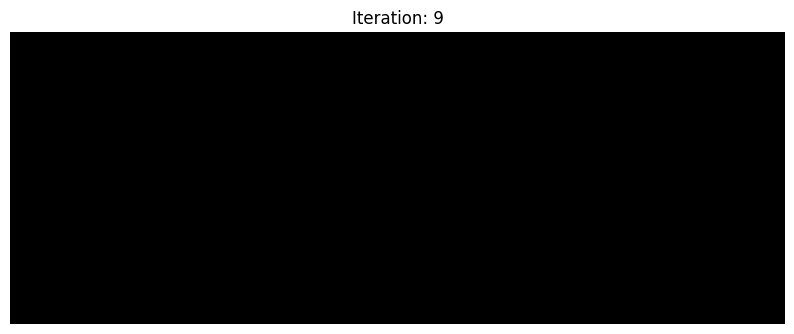

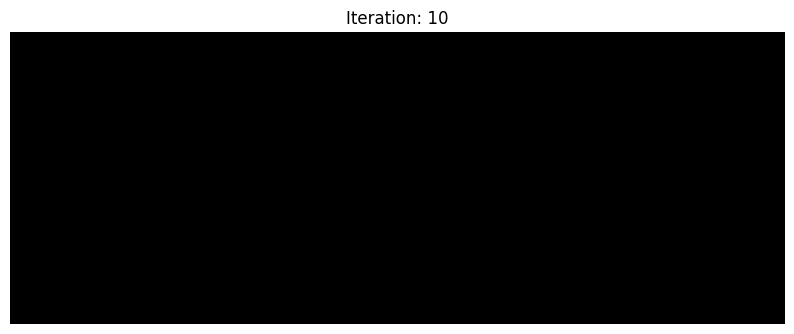

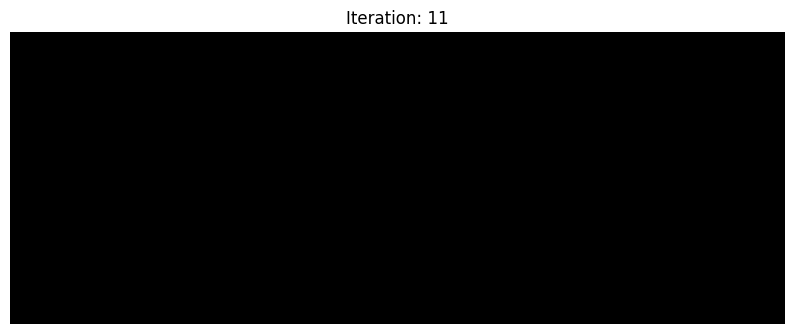

In [41]:
template2 = img.copy()

for cnt in range(100):
    if cnt <= 10:
        template2 = infinte_cube_AVG(template2)
        plt.figure(figsize=(10, 7))
        
        tmp_max = template2.max()
        tmp_min = template2.min()
        disp_img = (template2 - tmp_min) / (tmp_max - tmp_min)
        
        plt.imshow(disp_img)
        plt.title(f'Iteration: {cnt+1}')
        plt.axis('off')
        filename = f'iteration_{cnt+1}.png'
        plt.savefig(filename)


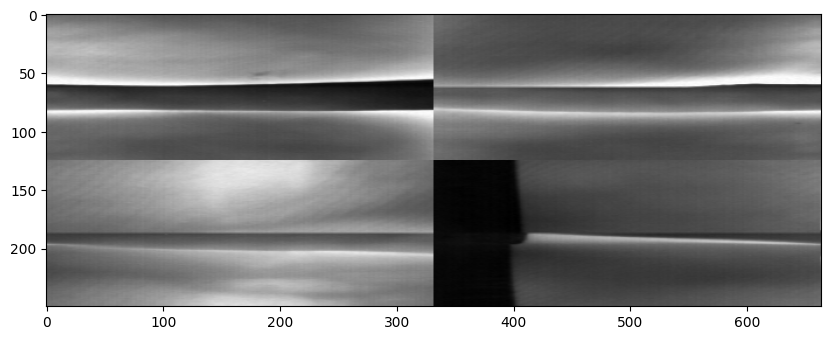

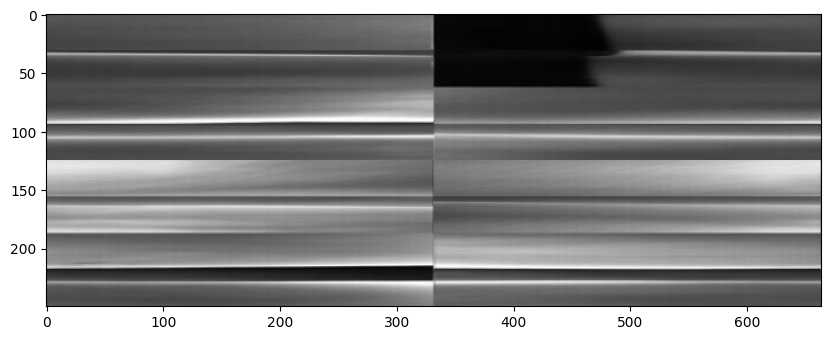

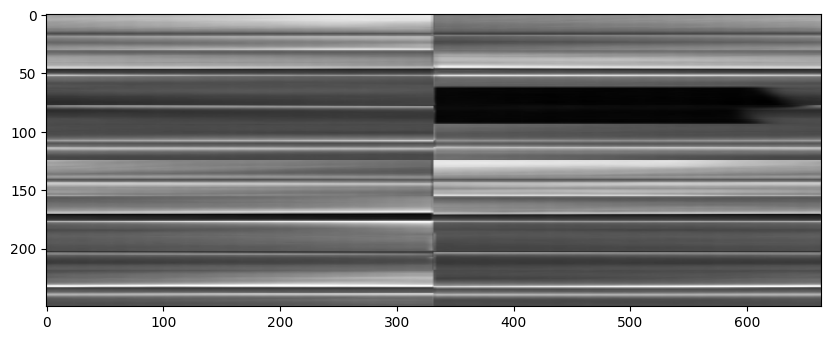

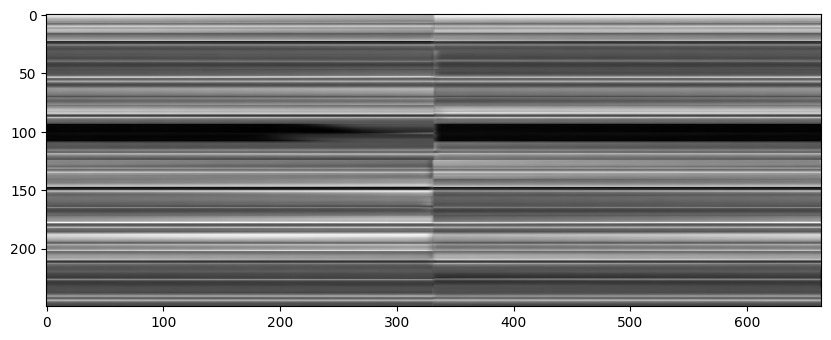

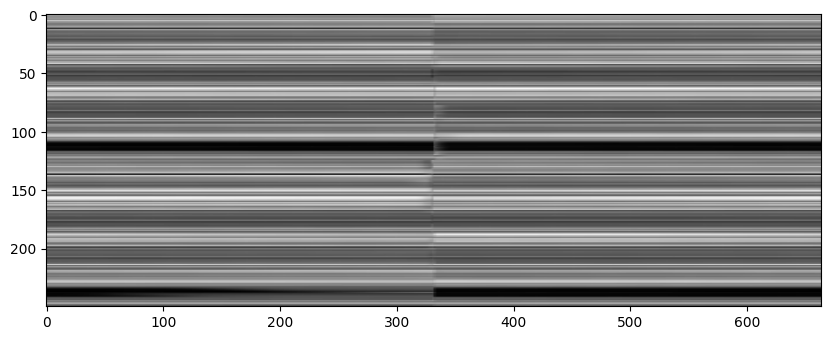

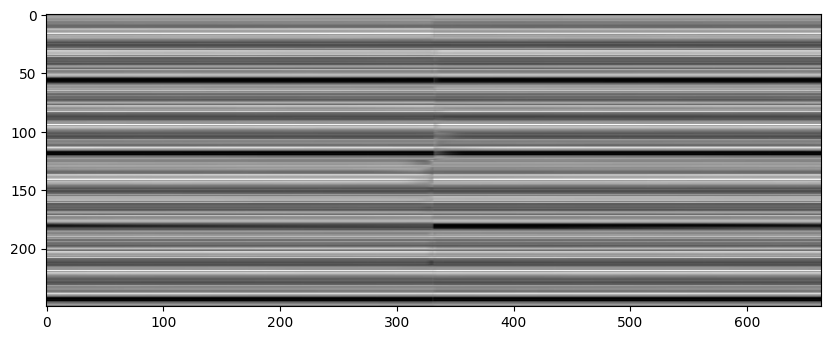

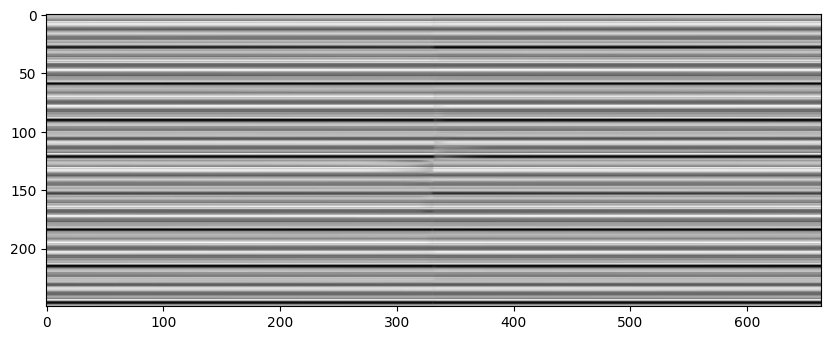

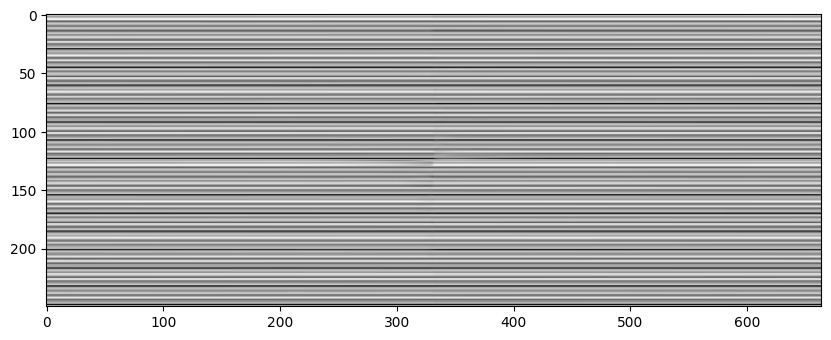

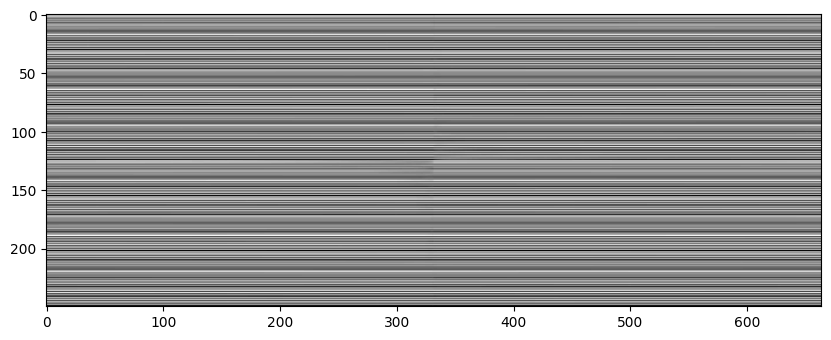

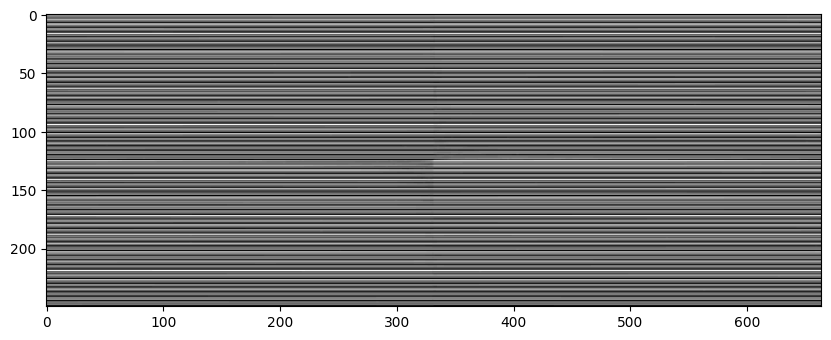

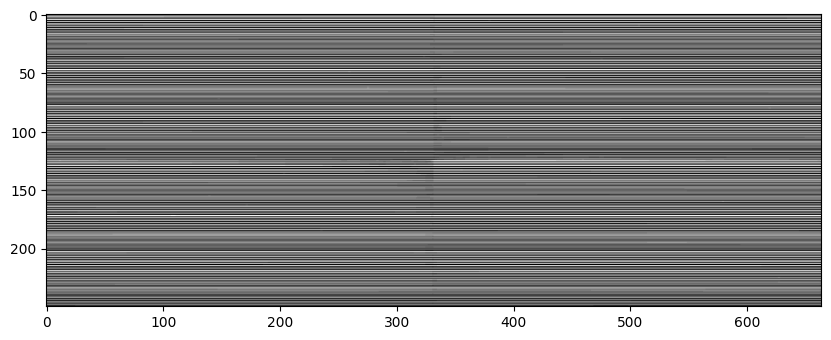

In [44]:
template1 = img.copy()

for cnt in range(100):
    if cnt <= 10:
        template1 = infinte_cube_with_exchange(template1)
        plt.figure(figsize=(10, 7))
        
        tmp_max = template1.max()
        tmp_min = template1.min()
        disp_img = (template1 - tmp_min) / (tmp_max - tmp_min)
        
        plt.imshow(disp_img)
        plt.show()
#         plt.title(f'Iteration: {cnt+1}')
#         plt.axis('off')
#         filename = f'iteration_{cnt+1}.png'
#         plt.savefig(filename)

# Creating different templates

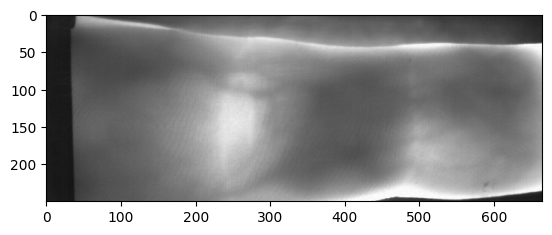

In [7]:
# Load image
img = cv2.imread('FV_base.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

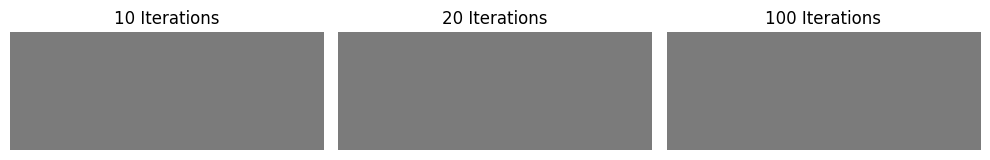

In [51]:
template1, template2, template3 = img.copy(), img.copy(), img.copy()

for cnt in range(100):
    if cnt <= 50:
        template1 = infinte_cube_with_exchange(template1)

    if cnt <=70:
        template2 = infinte_cube_with_exchange(template2)
    
    template3 = infinte_cube_with_exchange(template3)

plt.figure(figsize=(10, 7))
    
plt.subplot(131)
plt.imshow(template1)
plt.title('10 Iterations')
plt.axis('off')

plt.subplot(132)
plt.imshow(template1)
plt.title('20 Iterations')
plt.axis('off')

plt.subplot(133)
plt.imshow(template1)
plt.title('100 Iterations')
plt.axis('off')

plt.tight_layout()

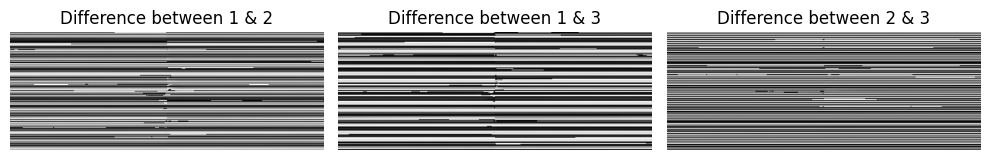

In [50]:
diff12 = np.absolute(template1 - template2)
diff13 = np.absolute(template1 - template3)
diff23 = np.absolute(template2 - template3)

plt.figure(figsize=(10, 7))
    
plt.subplot(131)
plt.imshow(diff12)
plt.title('Difference between 1 & 2')
plt.axis('off')

plt.subplot(132)
plt.imshow(diff13)
plt.title('Difference between 1 & 3')
plt.axis('off')

plt.subplot(133)
plt.imshow(diff23)
plt.title('Difference between 2 & 3')
plt.axis('off')

plt.tight_layout()

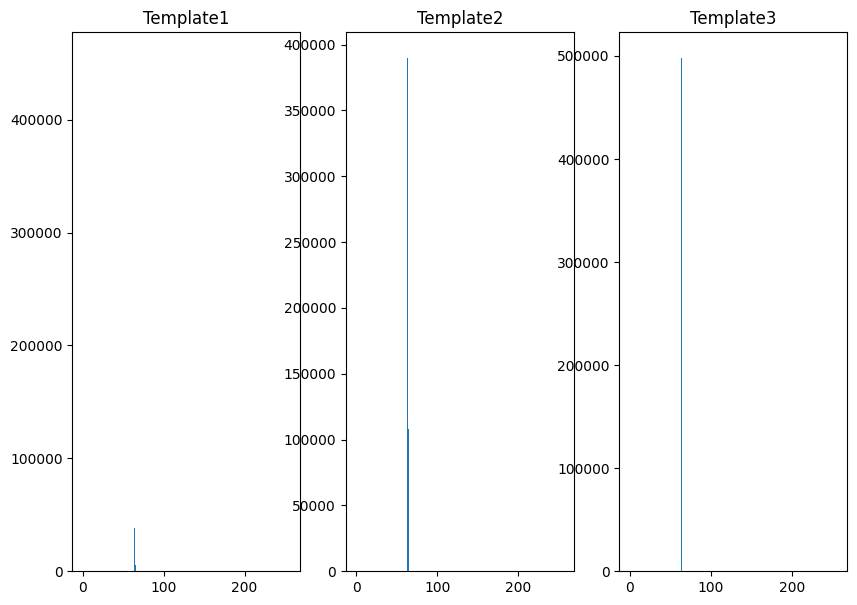

In [125]:
# Difference between templates

# Calculate the histograms, and normalize them
hist_img1 = cv2.calcHist([template1], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist_img2 = cv2.calcHist([template1], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Calculate the histograms, and normalize them
hist_img3 = cv2.calcHist([template3], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist_img3, hist_img3, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

plt.figure(figsize=(10, 7))

# plot the histograms of two images
plt.subplot(131)
plt.hist(template1.ravel(),256,[0,256])
plt.title('Template1')

plt.subplot(132)
plt.hist(template2.ravel(),256,[0,256])
plt.title('Template2')

plt.subplot(133)
plt.hist(template3.ravel(),256,[0,256])
plt.title('Template3')
plt.show()

In [99]:
# Find the metric value
metric_val1 = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CORREL)

# Chi-square value 0 mean both the iamges follow same distribution
metric_val2 = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CHISQR)
metric_val3 = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_INTERSECT)
metric_val4 = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_BHATTACHARYYA)

# DKL=0  holds iff P≃Q , i.e. the smaller DKL , the higher the similarity between distributions.
metric_val5 = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_KL_DIV)

print("Metric Value using Correlation Hist Comp Method", metric_val1)
print("Metric Value using Chi Square Hist Comp Method", metric_val2)
print("Metric Value using Intersection Hist Comp Method", metric_val3)
print("Metric Value using Bhattacharyya Hist Comp Method", metric_val4)
print("Metric Value using KL_Divergence Hist Comp Method", metric_val5)

Metric Value using Correlation Hist Comp Method -1.0
Metric Value using Chi Square Hist Comp Method 0.0
Metric Value using Intersection Hist Comp Method 115128.00343057513
Metric Value using Bhattacharyya Hist Comp Method 0.0
Metric Value using KL_Divergence Hist Comp Method 0.0


# Testing on Fingervein dataset

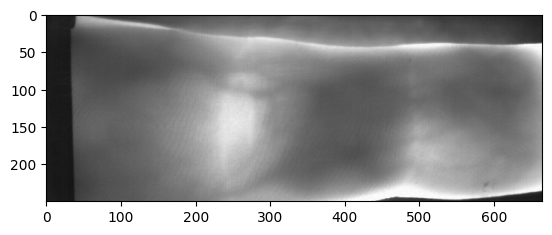

In [165]:
# Load image
img = cv2.imread('FV_base.png')

plt.imshow(img)

(-0.5, 664.5, 249.5, -0.5)

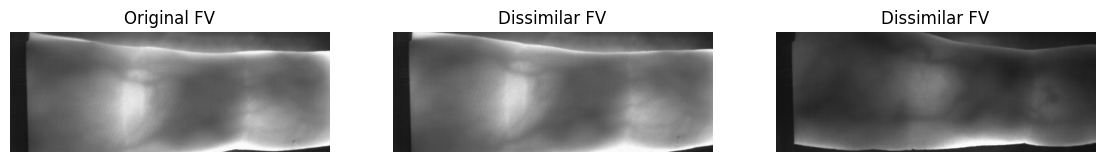

In [166]:
similar_FV = cv2.imread('similar_FV.png')
dissimilar_FV = cv2.cvtColor(similar_FV, cv2.COLOR_BGR2RGB)

dissimilar_FV = cv2.imread('dissimilar_FV.png')
dissimilar_FV = cv2.cvtColor(dissimilar_FV, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14, 7))
plt.subplot(131)
plt.title('Original FV')
plt.imshow(img)
plt.axis('off')

plt.subplot(132)
plt.title('Dissimilar FV')
plt.imshow(similar_FV)
plt.axis('off')

plt.subplot(133)
plt.title('Dissimilar FV')
plt.imshow(dissimilar_FV)
plt.axis('off')

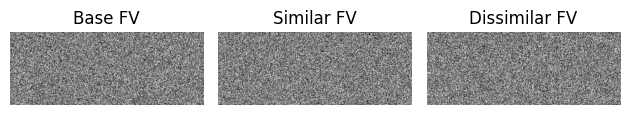

In [167]:
base_FV_temp, sim_FV_temp, dissim_FV_temp = img.copy(), similar_FV.copy(), dissimilar_FV.copy()


for cnt in range(11):
    base_FV_temp = infinte_cube(base_FV_temp)
    sim_FV_temp = infinte_cube(sim_FV_temp)
    dissim_FV_temp = infinte_cube(dissim_FV_temp)    

# plt.figure(figsize=(10, 7))
    
plt.subplot(131)
plt.imshow(base_FV_temp)
plt.title('Base FV')
plt.axis('off')

plt.subplot(132)
plt.imshow(sim_FV_temp)
plt.title('Similar FV')
plt.axis('off')

plt.subplot(133)
plt.imshow(dissim_FV_temp)
plt.title('Dissimilar FV')
plt.axis('off')

plt.tight_layout()

Text(0.5, 1.0, 'Dissimilar Ear Template')

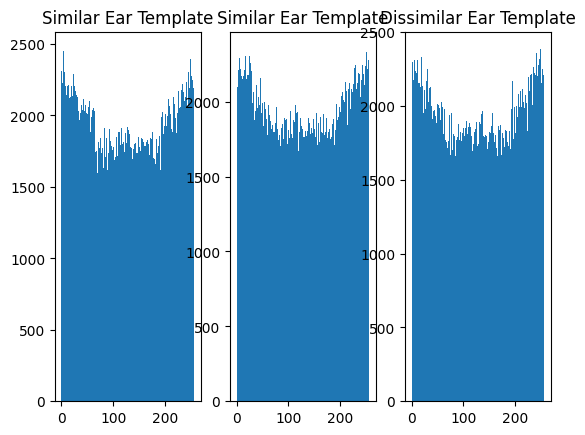

In [168]:
# Calculate the histograms, and normalize them
hist_base_FV_temp = cv2.calcHist([base_FV_temp], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist_base_FV_temp, hist_base_FV_temp, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist_sim_FV_temp = cv2.calcHist([sim_FV_temp], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist_sim_FV_temp, hist_sim_FV_temp, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

hist_dissim_FV_temp = cv2.calcHist([dissim_FV_temp], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist_dissim_FV_temp, hist_dissim_FV_temp, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# plot the histograms of two images
plt.subplot(131)
plt.hist(base_FV_temp.ravel(),256,[0,256])
plt.title('Similar Ear Template')


plt.subplot(132)
plt.hist(sim_FV_temp.ravel(),256,[0,256])
plt.title('Similar Ear Template')

plt.subplot(133)
plt.hist(dissim_FV_temp.ravel(),256,[0,256])
plt.title('Dissimilar Ear Template')


In [180]:
hist_base_FV_temp.shape, hist_sim_FV_temp.shape, hist_dissim_FV_temp.shape

((256, 256, 256), (256, 256, 256), (256, 256, 256))

In [183]:
# Find the metric value
sim_metric_val1 = cv2.compareHist(hist_base_FV_temp, hist_sim_FV_temp, cv2.HISTCMP_CORREL)

# Chi-square value 0 mean both the iamges follow same distribution
sim__val2 = cv2.compareHist(hist_base_FV_temp, hist_sim_FV_temp, cv2.HISTCMP_CHISQR)
sim__val3 = cv2.compareHist(hist_base_FV_temp, hist_sim_FV_temp, cv2.HISTCMP_INTERSECT)
sim__val4 = cv2.compareHist(hist_base_FV_temp, hist_sim_FV_temp, cv2.HISTCMP_BHATTACHARYYA)

# DKL=0  holds iff P≃Q , i.e. the smaller DKL , the higher the similarity between distributions.
metric_val5 = cv2.compareHist(hist_base_FV_temp, hist_sim_FV_temp, cv2.HISTCMP_KL_DIV)

print("Similar FV Metric Value using Correlation Hist Comp Method", metric_val1)
print("Similar FV Metric Value using Chi Square Hist Comp Method", metric_val2)
print("Similar FV Metric Value using Intersection Hist Comp Method", metric_val3)
print("Similar FV Metric Value using Bhattacharyya Hist Comp Method", metric_val4)
print("Similar FV Metric Value using KL_Divergence Hist Comp Method", metric_val5)

Similar FV Metric Value using Correlation Hist Comp Method -1.0
Similar FV Metric Value using Chi Square Hist Comp Method 0.0
Similar FV Metric Value using Intersection Hist Comp Method 115128.00343057513
Similar FV Metric Value using Bhattacharyya Hist Comp Method 0.0
Similar FV Metric Value using KL_Divergence Hist Comp Method -9.279623223332138


In [186]:
# Find the metric value
dissim_metric_val1 = cv2.compareHist(hist_base_FV_temp, hist_dissim_FV_temp, cv2.HISTCMP_CORREL)

# Chi-square value 0 mean both the iamges follow same distribution
dissim__val2 = cv2.compareHist(hist_base_FV_temp, hist_dissim_FV_temp, cv2.HISTCMP_CHISQR)
dissim__val3 = cv2.compareHist(hist_base_FV_temp, hist_dissim_FV_temp, cv2.HISTCMP_INTERSECT)
dissim__val4 = cv2.compareHist(hist_base_FV_temp, hist_dissim_FV_temp, cv2.HISTCMP_BHATTACHARYYA)

# DKL=0  holds iff P≃Q , i.e. the smaller DKL , the higher the similarity between distributions.
metric_val5 = cv2.compareHist(hist_base_FV_temp, hist_dissim_FV_temp, cv2.HISTCMP_KL_DIV)

print("Similar Ear Metric Value using Correlation Hist Comp Method", metric_val1)
print("Similar Ear Metric Value using Chi Square Hist Comp Method", metric_val2)
print("Similar Ear Metric Value using Intersection Hist Comp Method", metric_val3)
print("Similar Ear Metric Value using Bhattacharyya Hist Comp Method", metric_val4)
print("Similar Ear Metric Value using KL_Divergence Hist Comp Method", metric_val5)

Similar Ear Metric Value using Correlation Hist Comp Method -1.0
Similar Ear Metric Value using Chi Square Hist Comp Method 0.0
Similar Ear Metric Value using Intersection Hist Comp Method 115128.00343057513
Similar Ear Metric Value using Bhattacharyya Hist Comp Method 0.0
Similar Ear Metric Value using KL_Divergence Hist Comp Method -6.212270320993851


# ************************************ Atomic steps ************************************

(250, 664, 3)

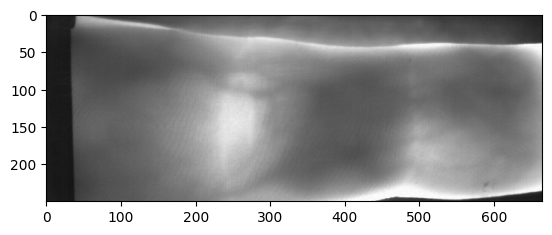

In [23]:
img = cv2.imread('FV_base.png')
# img = cv2.imread('img1.png')
# img = cv2.imread('arnold_sample.jpg')

plt.imshow(img)
if img.shape[1]%2 != 0:
    img = img[:, 0:img.shape[1]-1, :]
# plt.imsave('atomic_steps\orig_img.png', img)
img.shape

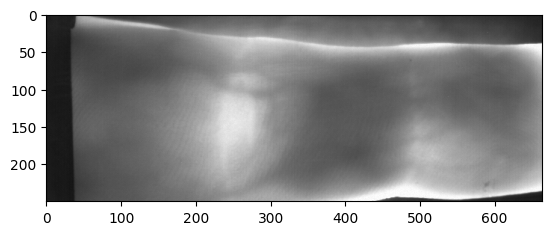

(250, 664, 3)

In [24]:
# # Expand horizontally
# new_img = cv2.resize(img, (2*img.shape[1], img.shape[0]))
new_img = img.copy()
plt.imshow(new_img)
plt.show()
# plt.imsave('atomic_steps\step1.png', new_img)
new_img.shape

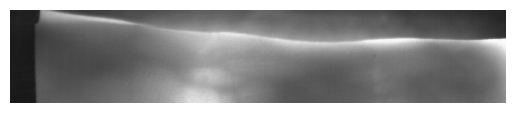

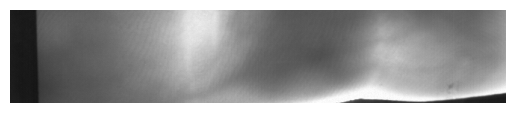

((125, 664, 3), (125, 664, 3))

In [25]:
# Split image vertically into top image and bottom image
height, width, channels = new_img.shape
half_height = height//2

top_img, bottom_img = new_img[:half_height, :], new_img[half_height:, :]

plt.imshow(top_img)
plt.axis('off')
plt.show()

plt.imshow(bottom_img)
plt.axis('off')
plt.show()

# plt.imsave('atomic_steps\step2.1.png', top_img)
# plt.imsave('atomic_steps\step2.2.png', bottom_img)
top_img.shape, bottom_img.shape

(-0.5, 663.5, 249.5, -0.5)

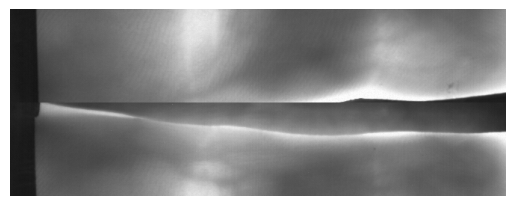

In [28]:
# # Perform XOR operation between top and bottom section of images
# XOR_img = top_img ^ bottom_img
exch_img = cv2.vconcat([bottom_img, top_img])

# plt.imshow(XOR_img)
plt.imshow(exch_img)
plt.axis('off')

# plt.imsave('atomic_steps\step2.3.png', XOR_img)
# XOR_img.shape

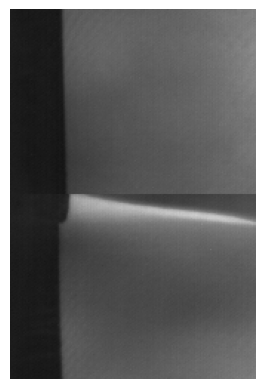

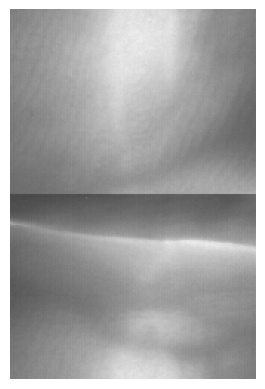

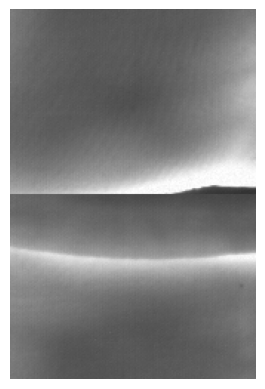

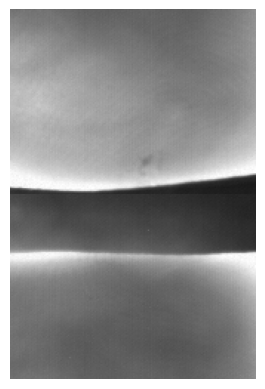

((250, 166, 3), (250, 166, 3), (250, 166, 3), (250, 166, 3))

In [29]:
# Split image into 4 equal parts
height, width, channels = exch_img.shape
quarter_width = int(width//4)

# img1, img2, img3, img4 = XOR_img[:, 0:quarter_width], XOR_img[:, quarter_width: 2*quarter_width], XOR_img[:, 2*quarter_width:3*quarter_width], XOR_img[:, 3*quarter_width:]
img1, img2, img3, img4 = exch_img[:, 0:quarter_width], exch_img[:, quarter_width: 2*quarter_width], exch_img[:, 2*quarter_width:3*quarter_width], exch_img[:, 3*quarter_width:]


plt.imshow(img1)
plt.axis('off')
plt.show()
plt.imshow(img2)
plt.axis('off')
plt.show()
plt.imshow(img3)
plt.axis('off')
plt.show()
plt.imshow(img4)
plt.axis('off')
plt.show()

# plt.imsave('atomic_steps\step3.1.1.png', img1)
# plt.imsave('atomic_steps\step3.1.2.png', img2)
# plt.imsave('atomic_steps\step3.1.3.png', img3)
# plt.imsave('atomic_steps\step3.1.4.png', img4)
img1.shape, img2.shape, img3.shape, img4.shape

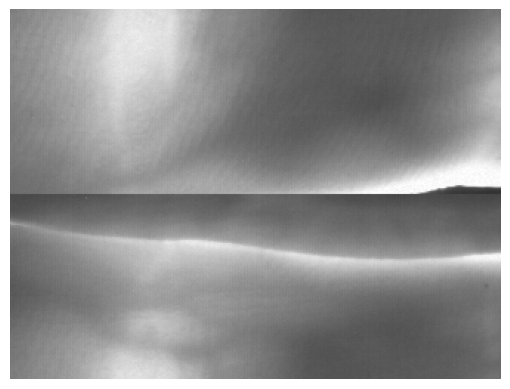

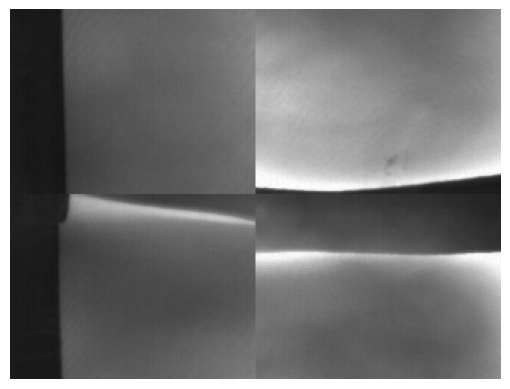

((250, 332, 3), (250, 332, 3))

In [30]:
# Create new top and bottom images by merging middle two images and two outermost images respectively 
top_img = cv2.hconcat([img2, img3])
bottom_img = cv2.hconcat([img1, img4])

plt.imshow(top_img)
plt.axis('off')
plt.show()
plt.imshow(bottom_img)
plt.axis('off')
plt.show()

# plt.imsave('atomic_steps\step3.2.1.png', top_img)
# plt.imsave('atomic_steps\step3.2.2.png', bottom_img)
top_img.shape, bottom_img.shape

(500, 332, 3)

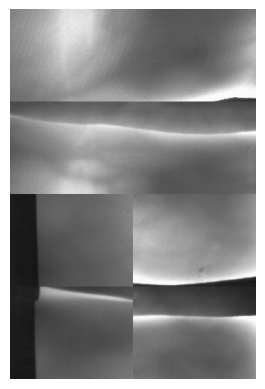

In [31]:
# Form the image of originaly shape by concatenating the two images vertically
new_img = cv2.vconcat([top_img, bottom_img])
plt.imshow(new_img)
plt.axis('off')
# plt.imsave('atomic_steps\step3.3.png', new_img)
new_img.shape

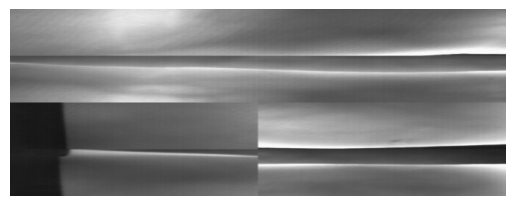

(250, 664, 3)

In [33]:
# Expand vertically
new_img = cv2.resize(new_img, (img.shape[1], img.shape[0]))

plt.imshow(new_img)
plt.axis('off')
plt.show()
# plt.imsave('atomic_steps\step4.png', new_img)
new_img.shape

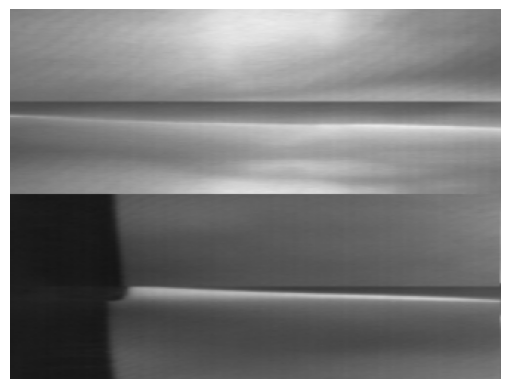

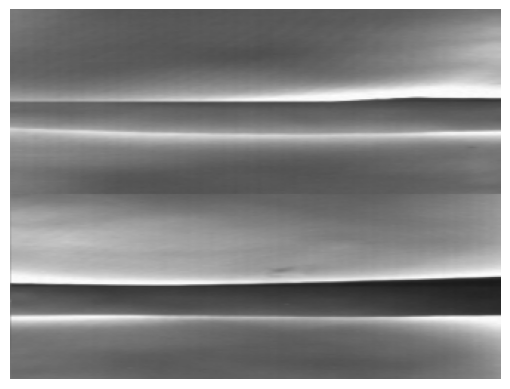

((250, 332, 3), (250, 332, 3))

In [35]:
# Split image horizontally into left image and right image
height, width, channels = new_img.shape
half_width = width//2

left_img, right_img = new_img[:, :half_width], new_img[:, half_width:]

plt.imshow(left_img)
plt.axis('off')
plt.show()

plt.imshow(right_img)
plt.axis('off')
plt.show()
# plt.imsave('atomic_steps\step5.1.png', left_img)
# plt.imsave('atomic_steps\step5.2.png', right_img)
left_img.shape, right_img.shape

(-0.5, 331.5, 499.5, -0.5)

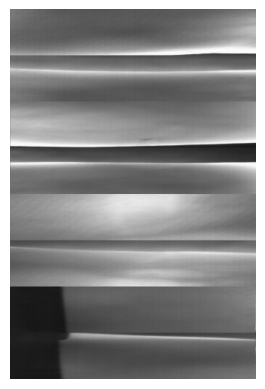

In [36]:
# # Perform XOR operation between left and right section of images
# XOR_img = left_img ^ right_img
exch_img = cv2.vconcat([right_img, left_img])

# plt.imshow(XOR_img)
plt.imshow(exch_img)

plt.axis('off')
# plt.imsave('atomic_steps\step5.3.png', XOR_img)
# XOR_img.shape

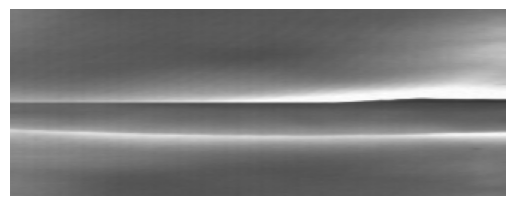

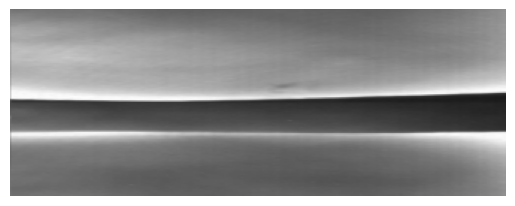

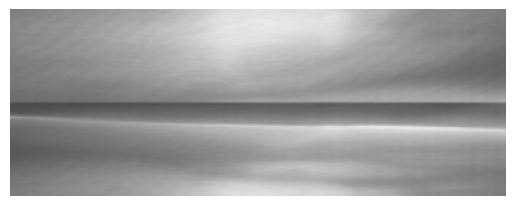

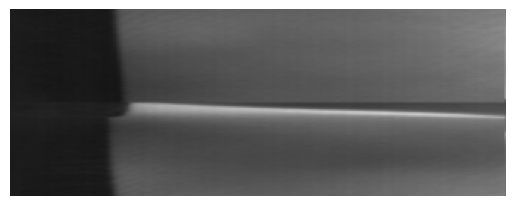

((125, 332, 3), (125, 332, 3), (125, 332, 3), (125, 332, 3))

In [38]:
# Split image into 4 equal parts
height, width, channels = exch_img.shape
quarter_height = height//4

img1, img2, img3, img4 = exch_img[0:quarter_height, :], exch_img[quarter_height:2*quarter_height, :], exch_img[2*quarter_height:3*quarter_height, :], exch_img[3*quarter_height:, :]

plt.imshow(img1)
plt.axis('off')
plt.show()

plt.imshow(img2)
plt.axis('off')
plt.show()

plt.imshow(img3)
plt.axis('off')
plt.show()

plt.imshow(img4)
plt.axis('off')
plt.show()

# plt.imsave('atomic_steps\step6.1.1.png', img1)
# plt.imsave('atomic_steps\step6.1.2.png', img2)
# plt.imsave('atomic_steps\step6.1.3.png', img3)
# plt.imsave('atomic_steps\step6.1.4.png', img4)
img1.shape, img2.shape, img3.shape, img4.shape

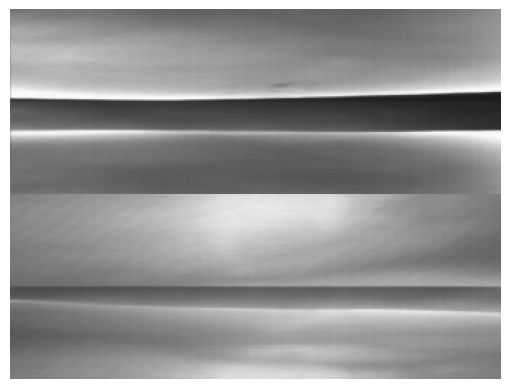

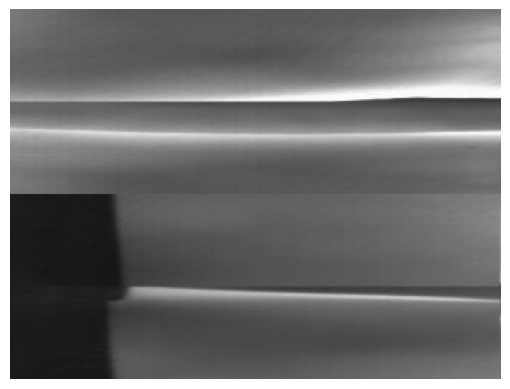

((250, 332, 3), (250, 332, 3))

In [39]:
# Create new left and right images by merging middle two images and two outermost images respectively 
left_img = cv2.vconcat([img2, img3])
right_img = cv2.vconcat([img1, img4])

plt.imshow(left_img)
plt.axis('off')
plt.show()

plt.imshow(right_img)
plt.axis('off')
plt.show()

# plt.imsave('atomic_steps\step6.2.1.png', left_img)
# plt.imsave('atomic_steps\step6.2.2.png', right_img)
left_img.shape, right_img.shape

(250, 664, 3)

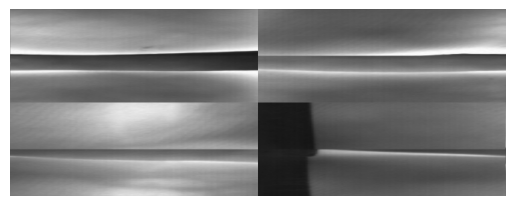

In [40]:
# Form the image of originaly shape by concatenating the two images vertically
new_img = cv2.hconcat([left_img, right_img])
plt.imshow(new_img)
plt.axis('off')
# plt.imsave('atomic_steps\step6.3.png', new_img)
new_img.shape